In [1]:
import numpy as np
import sys

import run_utils

sys.path.append('../') 

from reclab.recommenders import LibFM
from reclab import data_utils

In [2]:
users, items, ratings = data_utils.read_movielens100k()

default_params = dict(num_two_way_factors=8, learning_rate=0.1,
              bias_reg=0., one_way_reg=0., two_way_reg=0., 
              num_iter=100)

tuner = run_utils.ModelTuner((users, items, ratings), default_params,
                             n_fold=5, verbose=True)

In [3]:
regs = [0.0001, 0.001, 0.01, 0.1, 1]

params_list = [(reg, dict(bias_reg=reg, one_way_reg=reg, two_way_reg=reg)) for reg in regs]

res_dict = tuner.evaluate_list(params_list)

Evaluating: {'bias_reg': 0.0001, 'one_way_reg': 0.0001, 'two_way_reg': 0.0001}
Fold 1/5, mse=1.2832133165822153
Fold 2/5, mse=1.276124360208121
Fold 3/5, mse=1.320675145373945
Fold 4/5, mse=1.24566901476344
Fold 5/5, mse=1.2990263421120225
Average MSE: 1.2849416358079488
Evaluating: {'bias_reg': 0.001, 'one_way_reg': 0.001, 'two_way_reg': 0.001}
Fold 1/5, mse=1.2631371250661756
Fold 2/5, mse=1.2583770610113016
Fold 3/5, mse=1.3446030570692658
Fold 4/5, mse=1.2468049035836821
Fold 5/5, mse=1.2802301525984396
Average MSE: 1.278630459865773
Evaluating: {'bias_reg': 0.01, 'one_way_reg': 0.01, 'two_way_reg': 0.01}
Fold 1/5, mse=1.185483378041485
Fold 2/5, mse=1.2085952771023225
Fold 3/5, mse=1.2325084923694671
Fold 4/5, mse=1.1823397503771493
Fold 5/5, mse=1.1657936546069418
Average MSE: 1.1949441104994731
Evaluating: {'bias_reg': 0.1, 'one_way_reg': 0.1, 'two_way_reg': 0.1}
Fold 1/5, mse=0.9243079994741336
Fold 2/5, mse=0.9437041706728276
Fold 3/5, mse=0.9701362620565996
Fold 4/5, mse=0.94

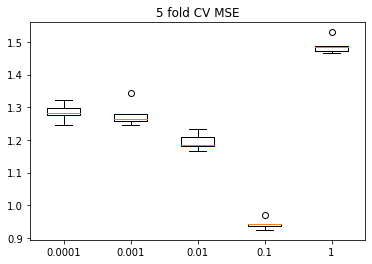

In [4]:
import matplotlib.pyplot as plt

plt.figure()
plt.title("5 fold CV MSE")
plt.boxplot(res_dict.values(), labels=res_dict.keys());